# Labo 8 - Lissage exponentiel et prévision

Aurélien Bloch - Pierric Ripoll

In [205]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing, Holt

## Étape 3

In [201]:
data = pd.read_csv('auscafe.csv', parse_dates=['date'], index_col='date', usecols=["Y", "date"])

train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]



## Étape 4

g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Prédiction avec un modèle de type Simple Exponential Smoothing')

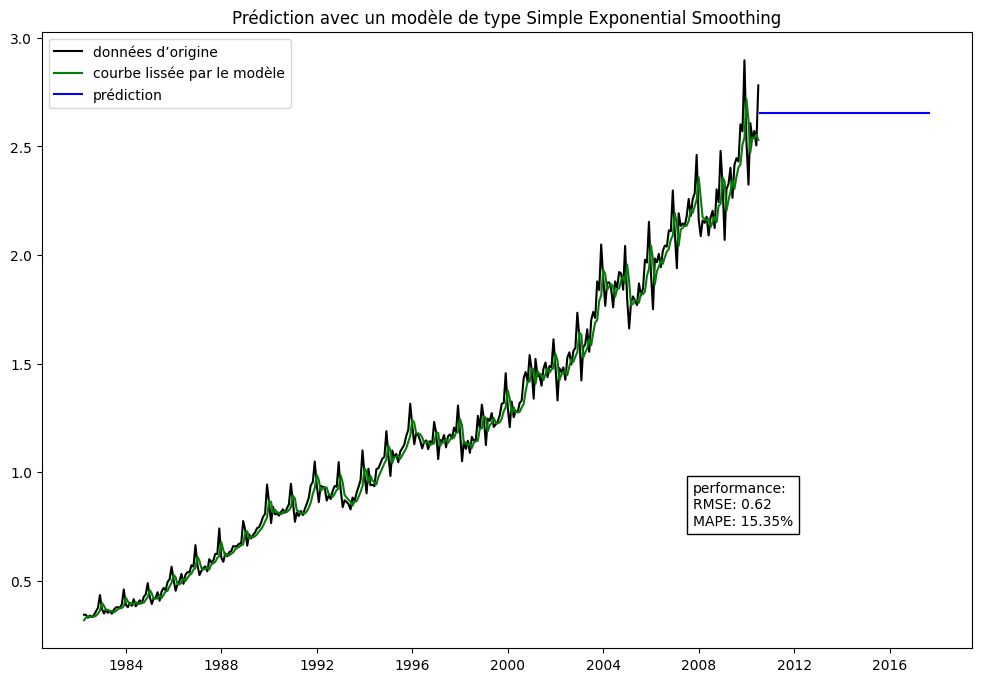

In [202]:
from sklearn.metrics import mean_squared_error

fit = SimpleExpSmoothing(train_data, initialization_method="heuristic").fit(
    smoothing_level=0.5, optimized=True
)

fcast = fit.predict(start=test_data.index[0], end=test_data.index[-1])

rmse = np.sqrt(mean_squared_error(test_data, fcast))
mape = np.mean(np.abs((test_data["Y"] - fcast) / test_data["Y"])) * 100

plt.figure(figsize=(12, 8))
plt.plot(train_data, color="black")
plt.plot(fit.fittedvalues, color="green")
plt.plot(fcast, color="blue")
plt.legend(["données d’origine", "courbe lissée par le modèle", "prédiction"])
plt.text(0.7, 0.2, 
    f"performance:\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%", 
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white'))
plt.title("Prédiction avec un modèle de type Simple Exponential Smoothing")

## Étape 5

g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


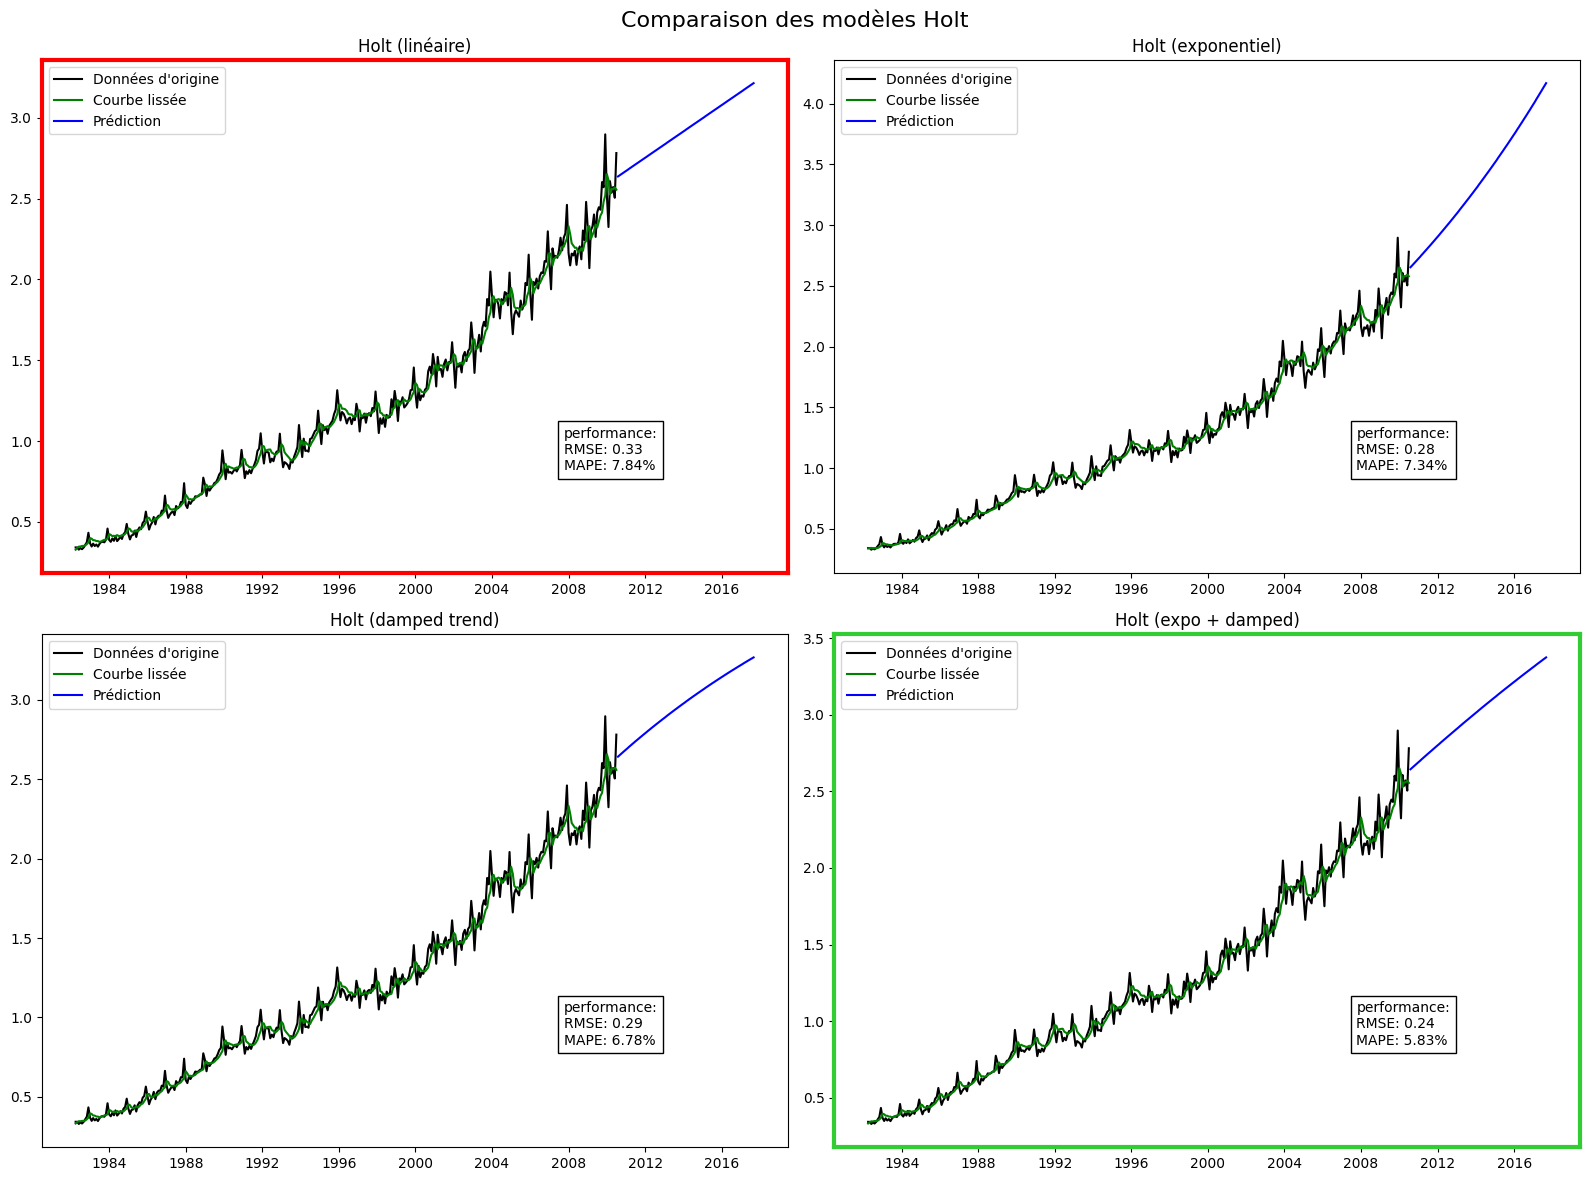

In [203]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle("Comparaison des modèles Holt", fontsize=16)

models = []
metrics = []

configs = [
    {"name": "Holt (linéaire)"},
    {"name": "Holt (exponentiel)", "exponential": True},
    {"name": "Holt (damped trend)", "damped_trend": True},
    {"name": "Holt (expo + damped)", "exponential": True, "damped_trend": True}
]


for cfg in configs:
    fit = Holt(train_data, initialization_method="estimated", **{k:v for k,v in cfg.items() if k != 'name'}).fit(optimized=True)
    fcast = fit.predict(start=test_data.index[0], end=test_data.index[-1])
    rmse = np.sqrt(mean_squared_error(test_data, fcast))
    mape = np.mean(np.abs((test_data["Y"] - fcast) / test_data["Y"])) * 100

    models.append((fit, fcast, cfg["name"]))
    metrics.append((rmse, mape))

best_idx = np.argmin(list(map(lambda g: g[0], metrics)))
worst_idx = np.argmax(list(map(lambda g: g[0], metrics)))

for i, (ax, (fit, fcast, title), (rmse, mape)) in enumerate(zip(axs.flatten(), models, metrics)):
    ax.plot(train_data, color="black", label="Données d'origine")
    ax.plot(fit.fittedvalues, color="green", label="Courbe lissée")
    ax.plot(fcast, color="blue", label="Prédiction")
    
    # Add border if best model
    if i == best_idx:
        for spine in ax.spines.values():
            spine.set_edgecolor('limegreen')
            spine.set_linewidth(3)
    
    if i == worst_idx:
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(3)
            
    # Metrics
    ax.text(0.7, 0.2, 
            f"performance:\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%", 
            transform=ax.transAxes,
            bbox=dict(facecolor='white'))
    
    ax.set_title(title)
    ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

On peut voir que le meilleur modèle est l'exponentien avec le trend dampening.

## Étape 6

g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
g:\Documents\HEIGVD\PCD\PCDLabs\Labo8\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

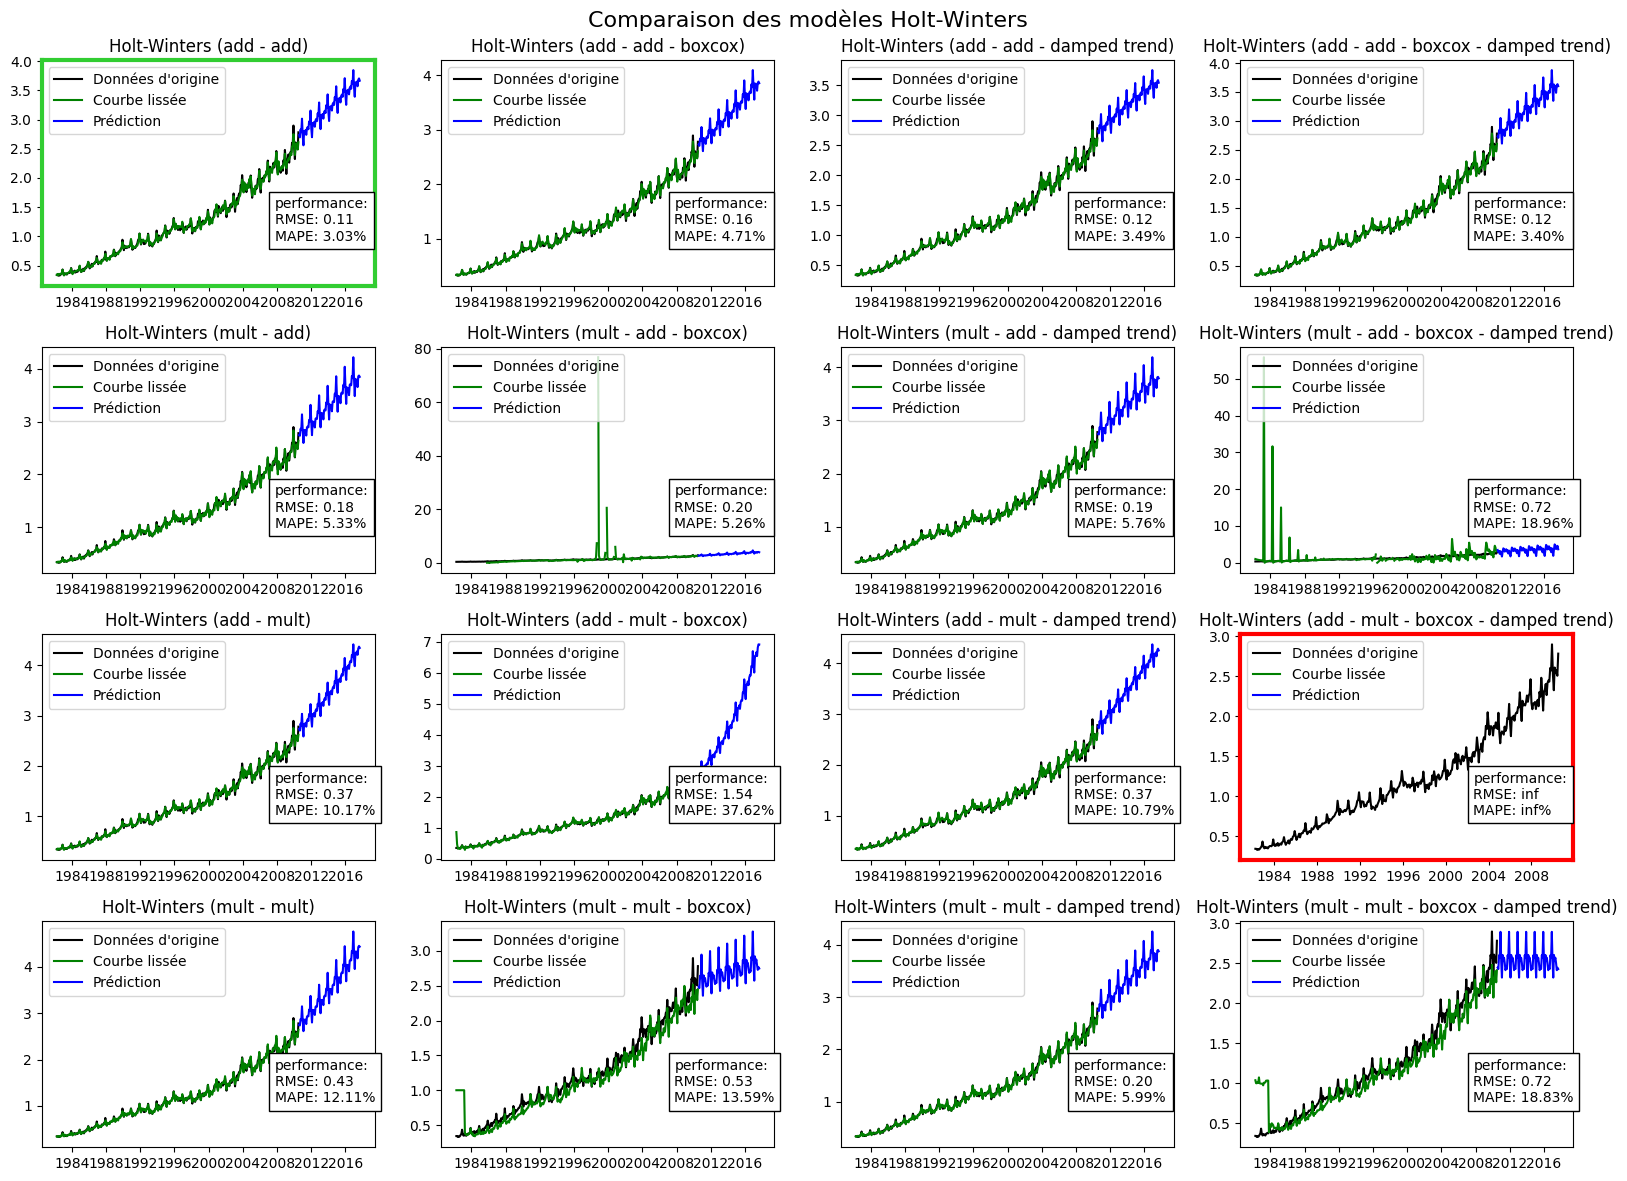

In [204]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fig, axs = plt.subplots(4, 4, figsize=(16, 12))
fig.suptitle("Comparaison des modèles Holt-Winters", fontsize=16)

models = []
metrics = []

configs = [
    {"name": "Holt-Winters (add - add)", "seasonal": 'add', "trend": 'add', "use_boxcox": False, "damped_trend": False},
    {"name": "Holt-Winters (add - add - boxcox)", "seasonal": 'add', "trend": 'add', "use_boxcox": True, "damped_trend": False},
    {"name": "Holt-Winters (add - add - damped trend)", "seasonal": 'add', "trend": 'add', "use_boxcox": False, "damped_trend": True},
    {"name": "Holt-Winters (add - add - boxcox - damped trend)", "seasonal": 'add', "trend": 'add', "use_boxcox": True, "damped_trend": True},
    {"name": "Holt-Winters (mult - add)", "seasonal": 'mul', "trend": 'add', "use_boxcox": False, "damped_trend": False},
    {"name": "Holt-Winters (mult - add - boxcox)", "seasonal": 'mul', "trend": 'add', "use_boxcox": True, "damped_trend": False},
    {"name": "Holt-Winters (mult - add - damped trend)", "seasonal": 'mul', "trend": 'add', "use_boxcox": False, "damped_trend": True},
    {"name": "Holt-Winters (mult - add - boxcox - damped trend)", "seasonal": 'mul', "trend": 'add', "use_boxcox": True, "damped_trend": True},
    {"name": "Holt-Winters (add - mult)", "seasonal": 'add', "trend": 'mul', "use_boxcox": False, "damped_trend": False},
    {"name": "Holt-Winters (add - mult - boxcox)", "seasonal": 'add', "trend": 'mul', "use_boxcox": True, "damped_trend": False},
    {"name": "Holt-Winters (add - mult - damped trend)", "seasonal": 'add', "trend": 'mul', "use_boxcox": False, "damped_trend": True},
    {"name": "Holt-Winters (add - mult - boxcox - damped trend)", "seasonal": 'add', "trend": 'mul', "use_boxcox": True, "damped_trend": True},
    {"name": "Holt-Winters (mult - mult)", "seasonal": 'mul', "trend": 'mul', "use_boxcox": False, "damped_trend": False},
    {"name": "Holt-Winters (mult - mult - boxcox)", "seasonal": 'mul', "trend": 'mul', "use_boxcox": True, "damped_trend": False},
    {"name": "Holt-Winters (mult - mult - damped trend)", "seasonal": 'mul', "trend": 'mul', "use_boxcox": False, "damped_trend": True},
    {"name": "Holt-Winters (mult - mult - boxcox - damped trend)", "seasonal": 'mul', "trend": 'mul', "use_boxcox": True, "damped_trend": True},
]



for cfg in configs:

    fit = ExponentialSmoothing(train_data, **{k:v for k,v in cfg.items() if k != 'name'}).fit(optimized=True)
    fcast = fit.predict(start=test_data.index[0], end=test_data.index[-1])

    # This particular configuration blows up the whole thing
    if cfg["name"] == "Holt-Winters (add - mult - boxcox - damped trend)" :
       models.append((fit, fcast, cfg["name"]))
       metrics.append((np.inf, np.inf))
       continue

    rmse = np.sqrt(mean_squared_error(test_data, fcast))
    mape = np.mean(np.abs((test_data["Y"] - fcast) / test_data["Y"])) * 100

    models.append((fit, fcast, cfg["name"]))
    metrics.append((rmse, mape))

best_idx = np.argmin(list(map(lambda g: g[0], metrics)))
worst_idx = np.argmax(list(map(lambda g: g[0], metrics)))

for i, (ax, (fit, fcast, title), (rmse, mape)) in enumerate(zip(axs.flatten(), models, metrics)):
    ax.plot(train_data, color="black", label="Données d'origine")
    ax.plot(fit.fittedvalues, color="green", label="Courbe lissée")
    ax.plot(fcast, color="blue", label="Prédiction")
    
    # Add border if best model
    if i == best_idx:
        for spine in ax.spines.values():
            spine.set_edgecolor('limegreen')
            spine.set_linewidth(3)
    
    if i == worst_idx:
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(3)

    # Metrics
    ax.text(0.7, 0.2, 
            f"performance:\nRMSE: {rmse:.2f}\nMAPE: {mape:.2f}%", 
            transform=ax.transAxes,
            bbox=dict(facecolor='white'))
    
    ax.set_title(title)
    ax.legend(loc="upper left")

plt.tight_layout()
plt.show()

On peut voir que le meilleur modèle est celui linéaire, sans transformation box-cox ni trend dampening.

Le modèle linéaire avec `seasonal=True`, tranformation de box-cox et trend dampening fait crasher mon code, et je n'ai pas réussi à régler ce problème.